In [ ]:
#installing tensorflow and keras
!pip install tensorflow_decision_forests
!pip install tf_keras

In [ ]:
#importing the relevent libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tfa
import tensorflow_decision_forests as tfdf
import seaborn as sns

In [ ]:
#importing OS environment
#allows you to use the older version of Keras when working with TensorFlow, primarily for compatibility reasons with code written for the standalone Keras library
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
#reading the csv data
df = pd.read_excel("spotone-ML.xlsx")
df

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,High,C-
4,7.25,24,30.0,Male,High,C-
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,B-
496,11.00,24,31.0,Female,Moderate,C
497,11.75,24,47.0,Male,High,B-
498,0.00,20,0.0,Female,Low,E


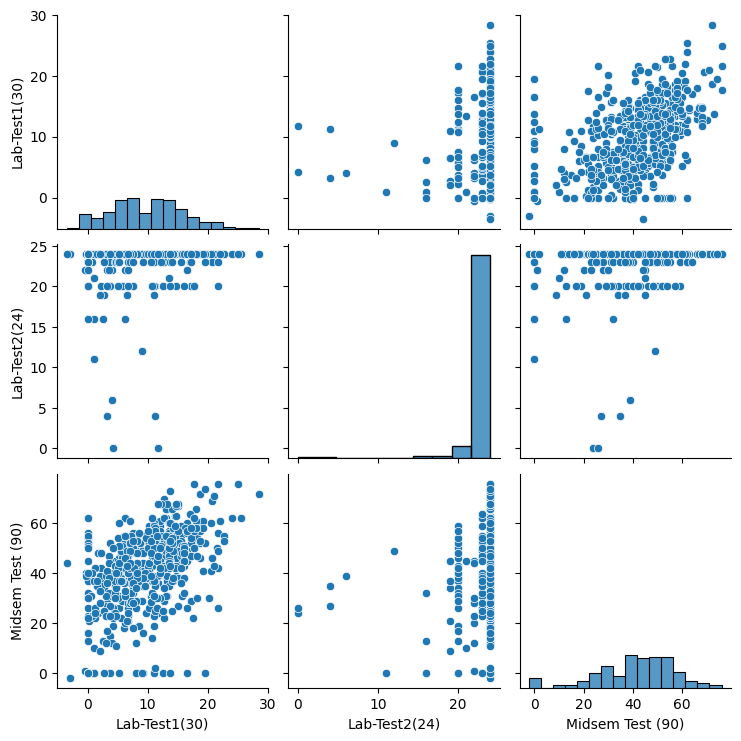

In [ ]:
#displaying the data as pairplots
sns.pairplot(df)

In [ ]:

label="Grade"
classes= encoded_df[label].unique().tolist()
print(f"Label classes: {classes}")
encoded_df[label]= encoded_df[label].map(classes.index)
encoded_df

Label classes: ['A', 'B-', 'C-', 'D', 'B', 'A-', 'C', 'E']


,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,0
1,15.00,24,67.0,Female,High,0
2,5.25,24,45.0,Male,High,1
3,2.75,19,34.0,Male,High,2
4,7.25,24,30.0,Male,High,2
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,1
496,11.00,24,31.0,Female,Moderate,6
497,11.75,24,47.0,Male,High,1
498,0.00,20,0.0,Female,Low,7


In [ ]:
#splitting data into training and testing data
def split_dataset(df, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(df)) < test_ratio
  return df[~test_indices], df[test_indices]

train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

353 examples in training, 147 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade")

In [ ]:
# Random Forest Model with 10 trees
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=10, max_depth=16)

# Train the model
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp531ubxcc as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-20 04:39:49.5600 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-20 04:39:49.5601 UTC kernel.cc:772] Collect training examples
[INFO 24-02-20 04:39:49.5601 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-20 04:39:49.5607 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-20 04:39:49.5607 UTC kernel.cc:392] Number of examples: 353
[INFO 24-02-20 04:39:49.5608 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-20 04:39:49.5609 UTC kernel.cc:792] Tra

Model trained in 0:00:00.081972
Compiling model...
Model compiled.


In [ ]:
#model evaluation
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 571ms/step - loss: 0.0000e+00 - accuracy: 0.8639

loss: 0.0000
accuracy: 0.8639


In [ ]:
#visualizing the first tree in the trained model
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

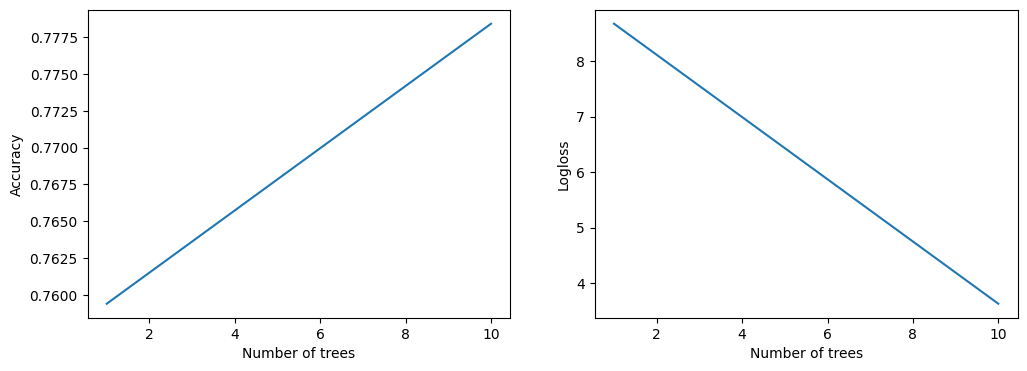

In [ ]:
#accuracy and logloss plots
import matplotlib.pyplot as plt
logs=model_1.make_inspector().training_logs()
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()

In [ ]:
# Model using Random Forest for 30 trees
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=30, max_depth=16)

# Train the model
model_1.fit(train_ds)


Use 2 thread(s) for training
Use /tmp/tmp_ptpstm1 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-20 04:40:01.3591 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-20 04:40:01.3592 UTC kernel.cc:772] Collect training examples
[INFO 24-02-20 04:40:01.3592 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-20 04:40:01.3593 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-20 04:40:01.3593 UTC kernel.cc:392] Number of examples: 353
[INFO 24-02-20 04:40:01.3594 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-20 04:40:01.3595 UTC kernel.cc:792] Tra

Model trained in 0:00:00.096780
Compiling model...
Model compiled.


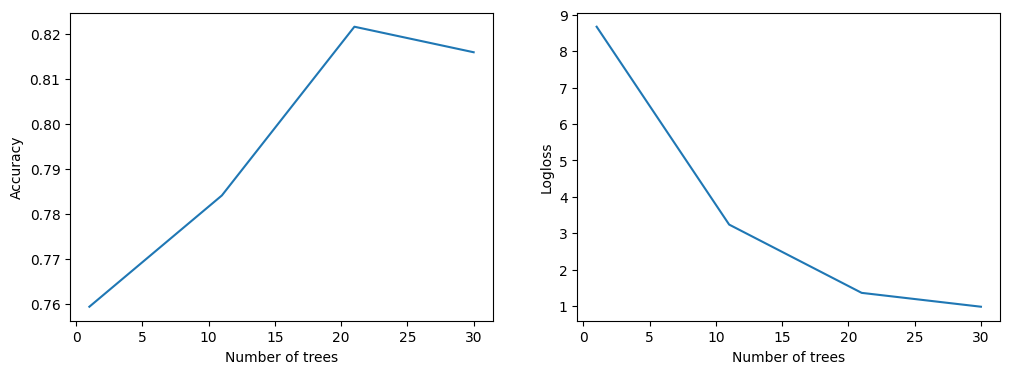

In [ ]:
#accuracy and logloss plots
import matplotlib.pyplot as plt
logs=model_1.make_inspector().training_logs()
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()

In [ ]:
#model evaluation
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")
#training accuracy is 0.819767 while testing accuracy is 0.8205. it can mean that the model was successful in preventing overfitting

1/1 [==============================] - 0s 149ms/step - loss: 0.0000e+00 - accuracy: 0.8707

loss: 0.0000
accuracy: 0.8707


In [ ]:
#Model using Gradient Boosted Decision Trees
model_2 = tfdf.keras.GradientBoostedTreesModel()
model_2.fit(train_ds)

print(model_2.summary())

Use /tmp/tmpnllph3of as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.270836. Found 353 examples.
Training model...
Model trained in 0:00:00.526442
Compiling model...
Model compiled.
Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Attendance
	Gender
	Lab-Test1(30)
	Lab-Test2(24)
	Midsem_Test_(90)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Midsem_Test_(90)"  0.751082 ################
    2.    "Lab-Test1(30)"  0.356422 ####
    3.    "Lab-Test2(24)"  0.256064 #
    4.       "Attendance"  0.203743 
    5.           "Gender"  0.194703 

Variable Importance: N

In [ ]:
#model evaluation
model_2.compile(metrics=["accuracy"])
evaluation = model_2.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

#We observe that the accuracy for Gradient Boosted Trees model is higher than that of Random Forest model

1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - accuracy: 0.8844

loss: 0.0000
accuracy: 0.8844


In [ ]:
# Optimizing the model for number of trees and max depth
#increasing the number of trees to 51 trees is giving the most accuracy after which accuracy is decreasing
#reducing max_depth to 8 gives more accuracy but increasing has no impact on accuracy; lower max_depth makes the model more general and hence accurate, to an extent.
model_opti = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=32, max_depth=10)

# Train the model
model_opti.fit(train_ds)

#model evaluation
model_opti.compile(metrics=["accuracy"])
evaluation = model_opti.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

model_opti.compile(metrics=["accuracy"])
evaluation = model_opti.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

Use 2 thread(s) for training
Use /tmp/tmp7jfni00s as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-20 04:44:07.8628 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-20 04:44:07.8628 UTC kernel.cc:772] Collect training examples
[INFO 24-02-20 04:44:07.8628 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-20 04:44:07.8629 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-20 04:44:07.8630 UTC kernel.cc:392] Number of examples: 353
[INFO 24-02-20 04:44:07.8631 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-20 04:44:07.8631 UTC kernel.cc:792] Tra

Model trained in 0:00:00.150959
Compiling model...
Model compiled.
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - accuracy: 0.8844

loss: 0.0000
accuracy: 0.8844
1/1 [==============================] - 0s 146ms/step - loss: 0.0000e+00 - accuracy: 0.8844

loss: 0.0000
accuracy: 0.8844
